# Portfolio Value at Risk and Conditional Value at Risk

Sourced from Quantopian Lecture Series (Jonathan Larkin and Delaney Granizo-Mackenzie)

In [87]:
import numpy as np
import pandas as pd
import math

from scipy.stats import norm
import time

import matplotlib.pyplot as plt

import yfinance as yf



# Risk Measures
#from nonNormalReturnsOptimization.riskMeasurments.VaR import *


Get all symbols of S&P500

In [88]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
symbols = df['Symbol'].values.tolist()
names = df['Security'].values.tolist()

Get Real Estate Symbols

In [89]:
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

real_estate_df = df[df['GICS Sector'] == 'Real Estate']
real_estate_symbols = real_estate_df['Symbol'].values.tolist()

In [135]:
tickers = real_estate_symbols
num_stocks = len(tickers)

start = time.time()
data = yf.download(tickers, start='2015-08-01', end='2020-08-01', period = "1d")
price_data = data['Adj Close']
end = time.time()
print("Time: %0.2f seconds." % (end - start))

[*********************100%***********************]  31 of 31 completed
Time: 3.49 seconds.


In [136]:
def convert_price_to_return(price_data):
    """
    Converts Price Data to Returns
    :param return_data: dataframe of returns of portfolio assets
    :return: returns minimum variance portfolio
    """
    portfolioAssets = price_data.head()
    
    return_data = pd.DataFrame()
    # Calculate Returns for Every Asset
    for asset in portfolioAssets:
        return_data[str(asset)] = (price_data[asset] - price_data[asset].shift(1)) / price_data[asset].shift(1)
    
    # Drop first row of Returns
    return_data = return_data.drop(return_data.index[0])
    return_data = return_data.dropna()
    return return_data

In [137]:
# Convert Price Data to Returns
return_data = convert_price_to_return(price_data)
return_data

,AIV,AMT,ARE,AVB,BXP,CBRE,CCI,DLR,DRE,EQIX,...,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-04,-0.001522,0.007970,-0.008812,-0.007587,-0.013392,-0.003179,0.001466,0.010518,-0.008408,-0.010075,...,-0.000681,-0.007606,0.000000,-0.008127,0.000849,-0.003507,-0.012158,-0.010083,-0.008879,0.008112
2015-08-05,-0.009144,0.005410,-0.008676,-0.001564,-0.014143,0.009833,0.003049,-0.004898,-0.010972,0.001464,...,0.001218,-0.009542,-0.004207,-0.007584,0.000795,-0.004399,-0.010860,-0.004943,-0.009536,-0.009012
2015-08-06,0.003332,0.017798,-0.003565,0.002262,-0.002803,-0.012105,-0.002553,0.002923,-0.000504,-0.001604,...,0.009045,-0.001106,0.006212,-0.000351,0.006359,0.005007,-0.004914,0.008430,-0.000876,-0.004222
2015-08-07,0.004855,0.013115,0.004229,0.006251,-0.006449,-0.002131,0.003657,0.001074,0.005045,0.001393,...,0.006362,0.003953,0.002387,-0.001669,0.009426,0.006741,0.007832,0.006120,0.004951,0.013046
2015-08-10,-0.002797,0.008429,-0.004859,-0.000518,-0.003578,0.022424,0.014695,-0.007814,0.005522,-0.001070,...,-0.006513,-0.012441,0.013879,0.000704,-0.013198,0.000000,0.007358,-0.009347,-0.009265,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.003085,0.015527,0.010739,-0.007695,-0.010367,-0.019231,0.010438,0.027349,0.012346,0.022525,...,0.001133,-0.001251,0.019452,0.009259,0.022949,-0.005354,-0.007141,-0.004473,-0.007973,0.052470
2020-07-28,0.034396,0.024932,0.020134,0.031018,0.015602,-0.011340,0.019829,0.019601,0.018823,-0.001950,...,0.044727,0.046104,0.025452,0.028803,0.035184,0.016431,0.041715,0.049424,0.041757,-0.008370
2020-07-29,0.021087,0.016829,0.013062,0.008919,-0.005926,0.027479,0.012167,0.020978,0.046058,0.023215,...,0.015320,0.008623,0.017070,0.010162,0.022607,-0.017559,0.000552,0.045491,0.029168,0.040367


In [117]:
def calculate_port_return(weights, mu):
    """
    Calculates the return of the portfolio
    :param weights: weight vector defining allocation between assets in portfolio
                mu: vector of historical returns of portfolio
    :return: returns return of portfolio
    """
    return np.dot(np.transpose(weights), mu)

In [118]:
def calculate_historical_returns(return_data):
    """
    Calculates the Mu matrix for the securities
    :param return_data: the data frame containing the returns
    :return: returns an array containing the arithmetic average return
    """
    return np.array(return_data.mean())

In [119]:
def calculate_port_variance(weights, Sigma):
    """
    Calculates the variance of returns of the portfolio
    :param weights: weight vector defining allocation between assets in portfolio
             sigma: covariance matrix of portfolio returns
    :return: returns variance of portfolio
    """
    return np.dot(np.dot(np.transpose(weights), Sigma), weights)

In [120]:
def calculate_gmv(return_data):
    """
    Calculates Minimum Variance Portfolio
    :param return_data: dataframe of returns of portfolio assets
    :return: returns minimum variance portfolio
    """
    # Preliminary Calculations
    numAssets = len(return_data.columns)
    mu = calculate_historical_returns(return_data)
    Sigma = return_data.cov().to_numpy()
    
    # Create B Matrix
    b = np.zeros( (numAssets+1, 1) )
    
    # Set Initial Constraint (w'1 = 1)
    b[numAssets, 0] = 1
    
    # Create A Matrix
    A = np.zeros( (numAssets+1, numAssets+1) )
    A[0:numAssets, 0:numAssets] = 2*Sigma
    A[numAssets,0:numAssets] = np.ones( (1,numAssets) )
    A[0:numAssets,numAssets] = np.ones( (1,numAssets) )
    
    # Solve for x
    x = np.dot(np.linalg.inv(A), b)
    
    # Calculate Minimum Variance Portfolio
    weights = x[0:numAssets]
    erp = calculate_port_return(weights, mu)
    sigmarp = math.sqrt(calculate_port_variance(weights, Sigma))
    minVarPort = (float(erp), float(sigmarp))
    
    return minVarPort

In [126]:
def calculate_MVE(return_data, mu0):
    """
    Calculates Minimum Variance Portfolio Given Level of Return
    :param return_data: dataframe of returns of portfolio assets
    :return: returns minimum variance portfolio given level of return
    """
    # Preliminary Calculations
    numAssets = len(return_data.columns)
    mu = calculate_historical_returns(return_data)
    Sigma = return_data.cov().to_numpy()
    
    # Create B Matrix
    b = np.zeros( (numAssets+2, 1) )
    
    # Set Initial Constraints (w'1 = 1), (E(rp)=mu0)
    b[numAssets, 0] = 1
    b[numAssets+1, 0] = mu0
    
    A = np.zeros( (numAssets+2, numAssets+2) )
    A[0:numAssets, 0:numAssets] = 2*Sigma
    A[numAssets,0:numAssets] = np.ones( (1,numAssets) )
    A[0:numAssets,numAssets] = np.ones( (1,numAssets) )
    A[numAssets+1,0:numAssets] = mu
    A[0:numAssets,numAssets+1] = mu
    
    # Solve for x
    x = np.dot(np.linalg.inv(A), b)
    
    # Calculate Efficient Portfolio
    weights = x[0:numAssets]
    erp = calculate_port_return(weights, mu)
    sigmarp = math.sqrt(calculate_port_variance(weights, Sigma))
    efficentPortfolio = (float(erp), float(sigmarp))
    
    return efficentPortfolio

In [127]:
def calculate_EF(return_data, gmvPort, mu0Increment=.001, mu0Itterations=25):
    """
    Calculates Efficient Frontier
    :param return_data: dataframe of returns of portfolio assets
    :return: returns efficent frontier of portfolio
    """
    EF = [[],[]]
    
    for mu0 in np.arange(gmvPort[0], mu0Itterations*mu0Increment + gmvPort[0], mu0Increment):
        efficentPortfolio = calculate_MVE(return_data, mu0)
        EF[0].append(efficentPortfolio[0])
        EF[1].append(efficentPortfolio[1])
        
    return EF

In [144]:
def calculate_value_at_risk(return_data, weights, alpha=0.95, lookback_days=520):
    # Calculate Weighted Portfolio Returns
    portfolio_returns = return_data.iloc[-lookback_days:].dot(weights)
    # Compute the correct percentile loss and multiply by value invested
    return np.percentile(portfolio_returns, 100 * (1-alpha))

In [145]:
weights = np.ones((num_stocks, 1))
calculate_value_at_risk(return_data, weights, alpha=0.95)

-0.7721846439807105

In [128]:
# Calculate Minimum Variance Portfolio
minVarPort = calculate_gmv(return_data)

In [133]:
EF = calculate_EF(return_data, minVarPort, mu0Increment=.001, mu0Itterations=25)

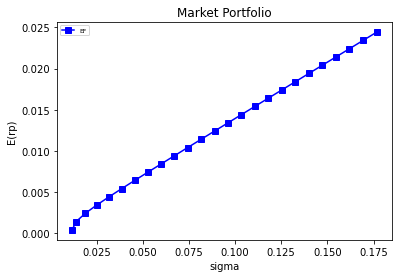

In [134]:
# Plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(EF[1], EF[0], linestyle='-', c='b', marker="s", label='EF')
plt.legend(loc='upper left', prop={'size': 6});
plt.title('Market Portfolio')
plt.xlabel('sigma')
plt.ylabel('E(rp)')
#plt.savefig('marketPortfolioOptimization.png')
plt.show()